In [1]:
from cybergis_compute_client import CyberGISCompute

cybergis = CyberGISCompute(url="cgjobsup-dev.cigi.illinois.edu", port=3030, protocol='HTTP', isJupyter=True)

In [2]:
cybergis.list_hpc()

hpc,ip,port,is_community_account
keeling_community,keeling.earth.illinois.edu,22,True
bridges_community,bridges2.psc.edu,22,True
hadoop,hadoop01.cigi.illinois.edu,50022,False


In [3]:
cybergis.list_maintainer()

maintainer,hpc,default_hpc,job_pool_capacity,executable_folder->from_user,executable_folder->must_have
SUMMA,['keeling_community'],keeling_community,5,True,"['summa_options.json', 'installTestCases_local.sh', 'data', 'output', 'settings']"
hello_world_singularity,['keeling_community'],keeling_community,5,False,not specified
community_contribution,"['keeling_community', 'bridges_community']",keeling_community,5,True,not specified
spatial_access,['keeling_community'],keeling_community,5,False,not specified


In [4]:
cybergis.list_git()

link,name,container,repository,commit
git://hello_world,hello world,python,https://github.com/cybergis/cybergis-compute-hello-world.git,NONE
git://bridge_hello_world,hello world,python,https://github.com/cybergis/CyberGIS-Compute-Bridges-2.git,NONE
git://spatial_access_covid-19,COVID-19 spatial accessibility,python,https://github.com/cybergis/cybergis-compute-spatial-access-covid-19.git,NONE


In [5]:
demo_job = cybergis.create_job('community_contribution')

📃 created constructor file [job_constructor_1626273270yaC4L.json]


In [6]:
demo_job.set(executableFolder="git://spatial_access_covid-19")

{'param': {}, 'env': {}, 'slurm': {}, 'executableFolder': 'git://spatial_access_covid-19'}


In [7]:
demo_job.submit()

✅ job submitted


In [8]:
demo_job.events(liveOutput=True)

📮 Job ID: 1626273270yaC4L
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


types,message,time
JOB_QUEUED,"job [1626273270yaC4L] is queued, waiting for registration",2021-07-14T09:34:29.000Z
JOB_REGISTERED,"job [1626273270yaC4L] is registered with the supervisor, waiting for initialization",2021-07-14T09:34:32.000Z
SLURM_UPLOAD,uploading files,2021-07-14T09:34:39.000Z
SSH_UNZIP,unzipping /data/keeling/a/cigi-gisolve/scratch/dev/1626273270yaC4L/executable.zip to /data/keeling/a/cigi-gisolve/scratch/dev/1626273270yaC4L/executable,2021-07-14T09:34:42.000Z
SSH_RM,removing /data/keeling/a/cigi-gisolve/scratch/dev/1626273270yaC4L/executable.zip,2021-07-14T09:34:45.000Z
SSH_CREATE_FILE,create file to /data/keeling/a/cigi-gisolve/scratch/dev/1626273270yaC4L/executable/job.json,2021-07-14T09:34:48.000Z
SLURM_MKDIR_RESULT,creating result folder,2021-07-14T09:34:48.000Z
SLURM_SUBMIT,submitting slurm job,2021-07-14T09:34:48.000Z
JOB_INIT,"job [1626273270yaC4L] is initialized, waiting for job completion",2021-07-14T09:34:48.000Z
SSH_ZIP,zipping /data/keeling/a/cigi-gisolve/scratch/dev/1626273270yaC4L/result to /data/keeling/a/cigi-gisolve/scratch/dev/1626273270yaC4L/result.zip,2021-07-14T09:57:38.000Z


In [9]:
demo_job.logs(liveOutput=True)

📮 Job ID: 1626273270yaC4L
💻 HPC: keeling_community
🤖 Maintainer: community_contribution


message,time
running setup Removed 108 nodes (0.0038%) from the OSMNX network Number of nodes: 28433 Number of edges: 75895 hospital setting is done Catchment for hospital 0 complete Catchment for hospital 1 complete Catchment for hospital 2 complete Catchment for hospital 3 complete Catchment for hospital 4 complete Catchment for hospital 5 complete Catchment for hospital 6 complete Catchment for hospital 7 complete Catchment for hospital 8 complete Catchment for hospital 9 co...[download for full log],2021-07-14T09:57:38.000Z
"0%| | 0/75895 [00:00<?, ?it/s] 31%|███▏ | 23737/75895 [00:00<00:00, 237361.17it/s] 63%|██████▎ | 47683/75895 [00:00<00:00, 237986.51it/s] 95%|█████████▌| 72279/75895 [00:00<00:00, 240322.46it/s] 100%|██████████| 75895/75895 [00:00<00:00, 241956.52it/s] Pop Centroid File Setting: 0%| | 0/878 [00:00<?, ?it/s] Pop Centroid File Setting: 1%|▏ | 11/878 [00:00<00:08, 106.57it/s] Pop Centroid File Setting: 3%|▎ | 23/878 [00:00<00:07, 108.30it/s] Pop...[download for full log]",2021-07-14T09:57:38.000Z


In [10]:
result_zip = demo_job.downloadResultFolder('./')

file successfully downloaded under: ./1626273270yaC4L.zip


In [11]:
import os, zipfile
extract_results_to = "access_result/"
os.mkdir(extract_results_to)
with zipfile.ZipFile(result_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_results_to)

<AxesSubplot:>

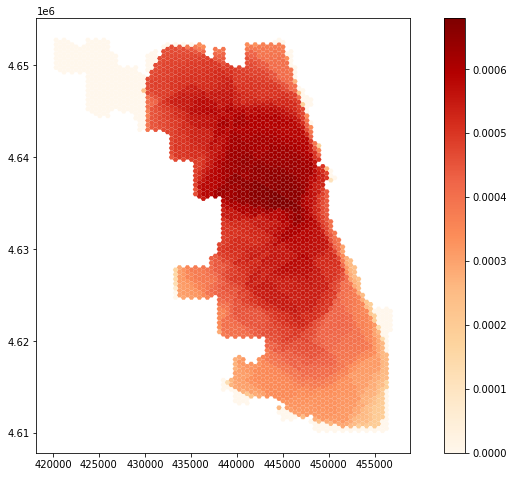

In [12]:
import geopandas as gpd
result = gpd.read_file(os.path.join(extract_results_to, "result.geojson"))
result.plot(column="hospital_vents", cmap="OrRd", legend=True, figsize=(12,8))